In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy

from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
from scipy.interpolate import interp1d
import sys
import math
import seaborn as sns
import inspect
from scipy import stats
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec


from matplotlib.colors import LogNorm
import statsmodels
import statsmodels.api as sm
from matplotlib.image import NonUniformImage
import re

In [98]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8.0,6.0]

colors = sns.color_palette("colorblind", 12)
colors1 = sns.color_palette("magma",3)
colors2 = sns.color_palette("magma",3)

# load data
data = pd.read_csv("../theory/old_files/results/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("../theory/old_files/results/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

w_vals = data['w'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [99]:
def poles(w,w_vals,pole_vals):
    f=interp1d(w_vals,pole_vals,fill_value="extrapolate")
    return(f(w))

def residues(w,w_vals, res_vals):
    res_vals=[-1*x for x in res_vals]
    f = interp1d(w_vals,res_vals,fill_value="extrapolate")
    return (f(w))

def get_gammae(w,s,w_vals,pole_vals,N=10000,D=1,d=1):
    l_c=np.sqrt(D/s)
    return(s*N*(l_c**d)*poles(w/l_c,w_vals,pole_vals))

def get_thetae(w,s,w_vals,res_vals,mu=1e-8,N=10000,D=1,d=1):
    l_c = np.sqrt(D / s)
    return(mu*N*(l_c**d)*residues(w/l_c,w_vals,res_vals))

def finite_sfs_k(n,k,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    logval = k*np.log(n)+thetae*np.log(gammae)-(k+thetae)*np.log(n+gammae)+loggamma(k+thetae)-loggamma(k+1)-loggamma(thetae)
    return(np.e**logval)

def finite_sfs_allelefreq(n,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    return thetae/gammae

def finite_sfs_het(n,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    return (2*thetae/gammae)*(1-(gammae+n+n*thetae)/(n*gammae))

def finite_sfs_segsites(n,w,s,w_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
    gammae = get_gammae(w,s,w_vals,pole_vals,N,D,d)
    thetae = get_thetae(w,s,w_vals,res_vals,mu,N,D,d)
    return 1-(gammae/(gammae+n))**thetae

In [100]:
color_palette_original = [
    "#003f5c",
    "#2f4b7c",
    "#665191",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600"
]
blue_shades = ["#0047AB", "#357ABD", "#7FAEE1"]

<ipython-input-112-ce902fa18e36>:127: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax12.plot(sfs_temp['allele counts'][0:]/nval, sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='o',linestyle='dashed')
<ipython-input-112-ce902fa18e36>:141: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax13.plot(sfs_temp['allele counts'][0:]/nval, sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='o',linestyle='dashed')


CPU times: user 13.5 ms, sys: 212 µs, total: 13.7 ms
Wall time: 13.9 ms
CPU times: user 61.3 ms, sys: 581 µs, total: 61.8 ms
Wall time: 62.2 ms


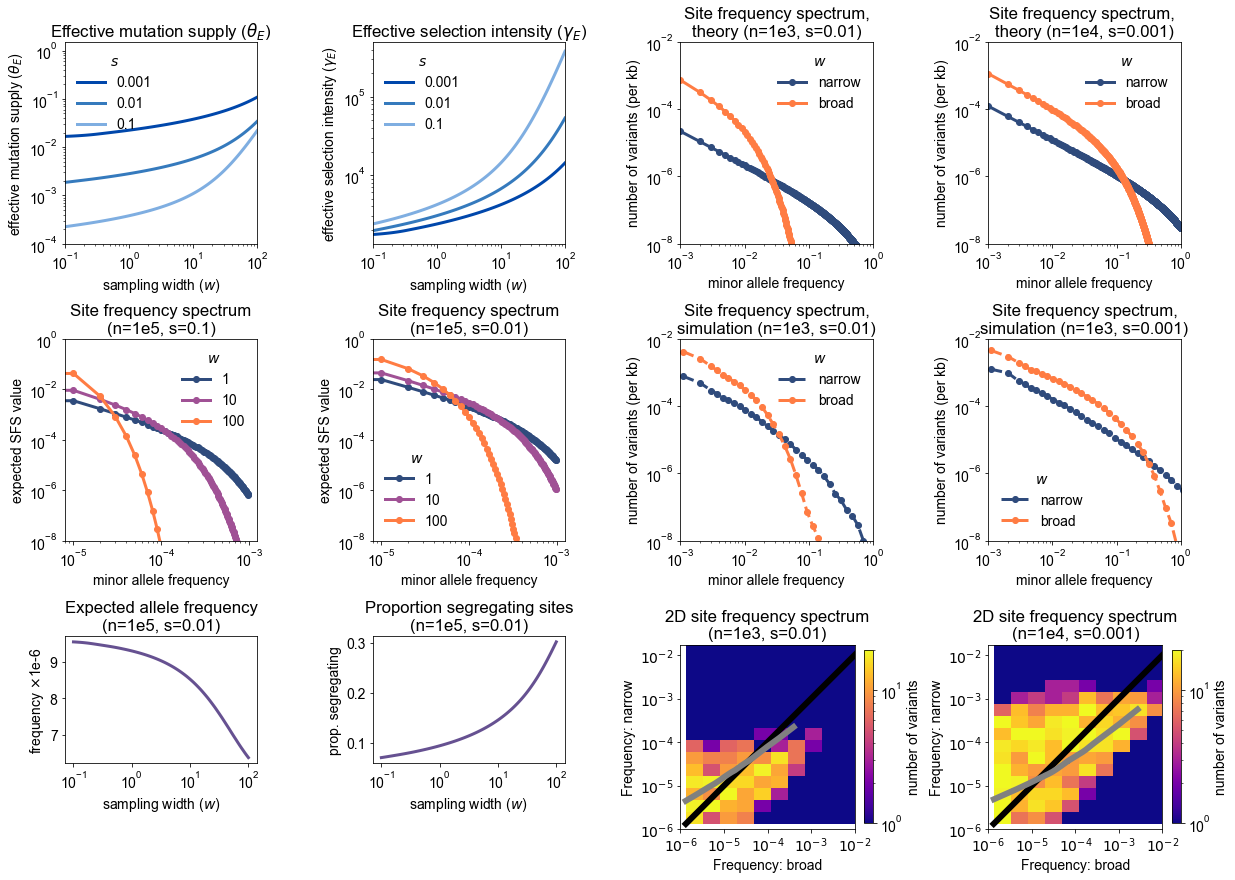

In [112]:
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(12, 4, wspace=0.6, hspace=0.4)

ax1 = fig.add_subplot(gs[0:3, 0])
ax2 = fig.add_subplot(gs[0:3, 1])
ax3 = fig.add_subplot(gs[4:7, 0])
ax4 = fig.add_subplot(gs[4:7, 1])
ax5 = fig.add_subplot(gs[8:10, 0])
ax6 = fig.add_subplot(gs[8:10, 1])
ax7 = fig.add_subplot(gs[8:11, 2])
ax8 = fig.add_subplot(gs[8:11, 3])
ax10 = fig.add_subplot(gs[0:3, 2])
ax11 = fig.add_subplot(gs[0:3, 3])
ax12 = fig.add_subplot(gs[4:7, 2])
ax13 = fig.add_subplot(gs[4:7, 3])


w_range = np.logspace(-1,2,100)
dim = 2
N = 1000
s_vals = [0.001, 0.01, 0.1]
ax1.plot(w_range,get_thetae(s=s_vals[0], w=w_range, w_vals=w_vals, res_vals=res_vals,
                    d=dim, N=N), color=blue_shades[0])
ax1.plot(w_range,get_thetae(s=s_vals[1], w=w_range, w_vals=w_vals, res_vals=res_vals,
                    d=dim, N=N), color=blue_shades[1])
ax1.plot(w_range,get_thetae(s=s_vals[2], w=w_range, w_vals=w_vals, res_vals=res_vals,
                    d=dim, N=N), color=blue_shades[2])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"sampling width ($w$)") 
ax1.set_ylabel(r"effective mutation supply ($\theta_E$)")
ax1.set_ylim(1e-4,1.5)
ax1.legend(title=r"$s$",frameon=False,labels=['0.001', '0.01', '0.1'],loc='best')
ax1.set_title(r"Effective mutation supply ($\theta_E$)")
ax1.set_xlim(1e-1,1e2)
ax2.plot(w_range,get_gammae(s=s_vals[0], w=w_range, w_vals=w_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=blue_shades[0])
ax2.plot(w_range,get_gammae(s=s_vals[1], w=w_range, w_vals=w_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=blue_shades[1])
ax2.plot(w_range,get_gammae(s=s_vals[2], w=w_range, w_vals=w_vals, pole_vals=pole_vals,
                    d=dim, N=N), color=blue_shades[2])
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel(r"effective selection intensity ($\gamma_E$)")
ax2.set_xlabel(r"sampling width ($w$)") 
ax2.set_title(r"Effective selection intensity ($\gamma_E$)")
ax2.legend(title=r"$s$",frameon=False,labels=['0.001', '0.01', '0.1'])
ax2.set_xlim(1e-1,1e2)

nval=100000
sval=0.1
kmax=100
step=1
w_vals_plot = [1,10,100]
sfs_w0 = [finite_sfs_k(nval,k,w_vals_plot[0],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w1 = [finite_sfs_k(nval,k,w_vals_plot[1],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w2 = [finite_sfs_k(nval,k,w_vals_plot[2],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
ax3.plot([x/nval for x in range(0,kmax,step)],sfs_w0,label=str(w_vals_plot[0]),marker='o',color=color_palette_original[1],linewidth=3,markersize=6)
ax3.plot([x/nval for x in range(0,kmax,step)],sfs_w1,label=str(w_vals_plot[1]),marker='o',color=color_palette_original[3],linewidth=3,markersize=6)
ax3.plot([x/nval for x in range(0,kmax,step)],sfs_w2,label=str(w_vals_plot[2]),marker='o',color=color_palette_original[6],linewidth=3,markersize=6)
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_ylim(1e-8,1e0)
# ax3.set_xlabel("minor allele count (k)")
ax3.set_xlabel("minor allele frequency")
ax3.set_ylabel("expected SFS value")
ax3.legend(title=r"$w$",frameon=False)
ax3.set_title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")

sval=0.01
sfs_w0 = [finite_sfs_k(nval,k,w_vals_plot[0],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w1 = [finite_sfs_k(nval,k,w_vals_plot[1],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w2 = [finite_sfs_k(nval,k,w_vals_plot[2],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
ax4.plot([x/nval for x in range(0,kmax,step)],sfs_w0,label=str(w_vals_plot[0]),marker='o',color=color_palette_original[1],linewidth=3,markersize=6)
ax4.plot([x/nval for x in range(0,kmax,step)],sfs_w1,label=str(w_vals_plot[1]),marker='o',color=color_palette_original[3],linewidth=3,markersize=6)
ax4.plot([x/nval for x in range(0,kmax,step)],sfs_w2,label=str(w_vals_plot[2]),marker='o',color=color_palette_original[6],linewidth=3,markersize=6)
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_ylim(1e-8,1e0)
ax4.set_title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")
# ax4.set_xlabel("minor allele count (k)")
ax4.set_xlabel("minor allele frequency")
ax4.set_ylabel("expected SFS value")
ax4.legend(title=r"$w$",frameon=False)

ax5.plot(w_range,finite_sfs_allelefreq(nval,w_range,s_vals[1],w_vals,pole_vals,res_vals,N=N)/1e-6,color=color_palette_original[2])
ax5.set_xscale("log")
ax5.set_xlabel(r"sampling width ($w$)") 
ax5.set_ylabel(r"frequency $\times$1e-6")
ax5.set_xticks([1e-1,1e0,1e1,1e2])
ax5.set_title("Expected allele frequency\n(n=1e5, s="+str(s_vals[1])+")")

ax6.plot(w_range,finite_sfs_segsites(nval,w_range,s_vals[1],w_vals,pole_vals,res_vals,N=N),color=color_palette_original[2])
ax6.set_xscale("log")
ax6.set_xlabel(r"sampling width ($w$)") 
ax6.set_ylabel(r"prop. segregating")
ax6.set_xticks([1e-1,1e0,1e1,1e2])
ax6.set_title("Proportion segregating sites\n(n=1e5, s="+str(s_vals[1])+")")

slim_data = pd.read_csv("../simulations/results_Dec2023/summary_df_norecap_dec2023.tsv", sep="\t")
slim_data = slim_data[slim_data['f_per_kb'] != 0]

slim_data_s_05 = slim_data[slim_data['s'] == -0.1]
slim_data_s_005 = slim_data[slim_data['s'] == -0.01]
slim_data_s_0005 = slim_data[slim_data['s'] == -0.001]

w_vals_slim = slim_data_s_05['width'].unique()
w_vals_slim = np.sort(w_vals_slim)
vals_to_plot = [w_vals_slim[5],w_vals_slim[-4]]

mu = 1e-10
nval = 1000
dens = 4/(1/.06)
Dval = 1
s_list = [0.01,0.001]
w_vals_plot2 = [4.08*6.1237,4.08*100]#[4.08*1.225,4.08*100]
kmax=1000
step=1

colors = [color_palette_original[1],color_palette_original[6]]

for width in vals_to_plot:
    sfs_data = slim_data_s_005
    sfs_temp = sfs_data[sfs_data['width'] == width]
    col_temp = colors[0] if width == vals_to_plot[0] else colors[1]
    lab_temp = "narrow" if width == vals_to_plot[0] else "broad"
    ax12.plot(sfs_temp['allele counts'][0:]/nval, sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='o',linestyle='dashed')
    ax12.set_xscale("log")
    ax12.set_yscale("log")
    ax12.set_ylim(1e-8, 1e-2)
    ax12.set_xlim(1e-3,1e0)
    ax12.set_title("Site frequency spectrum,\nsimulation (n=1e3, s="+str(s_list[0])+")")
    ax12.set_xlabel("minor allele frequency")
    ax12.set_ylabel("number of variants (per kb)")
    ax12.legend(title=r"$w$", frameon=False)
    
    sfs_data = slim_data_s_0005
    sfs_temp = sfs_data[sfs_data['width'] == width]
    col_temp = colors[0] if width == vals_to_plot[0] else colors[1]
    lab_temp = "narrow" if width == vals_to_plot[0] else "broad"
    ax13.plot(sfs_temp['allele counts'][0:]/nval, sfs_temp['f_per_kb'], color=col_temp, label=lab_temp, marker='o',linestyle='dashed')
    ax13.set_xscale("log")
    ax13.set_yscale("log")
    ax13.set_ylim(1e-8, 1e-2)
    ax13.set_xlim(1e-3,1e0)
    ax13.set_title("Site frequency spectrum,\nsimulation (n=1e3, s="+str(s_list[1])+")")
    ax13.set_xlabel("minor allele frequency")
    ax13.set_ylabel("number of variants (per kb)")
    ax13.legend(title=r"$w$", frameon=False)

numbp=2897694168
    
sfs_w0 = [finite_sfs_k(nval, k, w_vals_plot2[0], s_list[0], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]
sfs_w1 = [finite_sfs_k(nval, k, w_vals_plot2[1], s_list[0], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]

ax10.plot([x/nval for x in range(0,kmax,step)], sfs_w0, label="narrow", marker='o', color=colors[0])
ax10.plot([x/nval for x in range(0,kmax,step)], sfs_w1, label="broad", marker='o', color=colors[1])

ax10.set_xscale("log")
ax10.set_yscale("log")
ax10.set_ylim(1e-8, 1e-2)
ax10.set_xlim(1e-3,1e0)
ax10.legend(title=r"$w$", frameon=False)
ax10.set_title("Site frequency spectrum,\ntheory (n=1e3, s="+str(s_list[0])+")")
ax10.set_xlabel("minor allele frequency")
ax10.set_ylabel("number of variants (per kb)")


sfs_w0 = [finite_sfs_k(nval, k, w_vals_plot2[0], s_list[1], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]
sfs_w1 = [finite_sfs_k(nval, k, w_vals_plot2[1], s_list[1], w_vals, pole_vals, res_vals, D=Dval, N=dens, mu=mu)*1e3 for k in range(0, kmax, step)]

ax11.plot([x/nval for x in range(0,kmax,step)], sfs_w0, label="narrow", marker='o', color=colors[0])
ax11.plot([x/nval for x in range(0,kmax,step)], sfs_w1, label="broad", marker='o', color=colors[1])

ax11.set_xscale("log")
ax11.set_yscale("log")
ax11.set_ylim(1e-8, 1e-2)
ax11.set_xlim(1e-3,1e0)
ax11.legend(title=r"$w$", frameon=False)
ax11.set_title("Site frequency spectrum, \ntheory (n=1e4, s="+str(s_list[1])+")")
ax11.set_xlabel("minor allele frequency")
ax11.set_ylabel("number of variants (per kb)")


freqs_all_s_01 = pd.read_csv("../simulations/results_Dec2023/all_variants_s0.1.tsv", sep="\t")    
freqs_all_s_001 = pd.read_csv("../simulations/results_Dec2023/all_variants_s0.01.tsv", sep="\t")    
freqs_all_s_0001 = pd.read_csv("../simulations/results_Dec2023/all_variants_s0.001.tsv", sep="\t") 

freqs_all_s_01.columns = [re.sub(r'^[a-zA-Z]*', '', col) for col in freqs_all_s_01.columns]
freqs_all_s_001.columns = [re.sub(r'^[a-zA-Z]*', '', col) for col in freqs_all_s_001.columns]
freqs_all_s_0001.columns = [re.sub(r'^[a-zA-Z]*', '', col) for col in freqs_all_s_0001.columns]

lower_limit = 1e-6
upper_limit = 1e-1
samps = ['narrow','broad']
nbins = 15

global_min_xvals = 1e6
global_max_xvals = -1e6
global_min_yvals = 1e6
global_max_yvals = -1e6

for freq_data in [freqs_all_s_001, freqs_all_s_0001]:
    freqs_pos = freq_data.rename(columns={str(vals_to_plot[0]): 'narrow', str(vals_to_plot[1]): 'broad'})
    
    # Filter data based on the limits
    filtered_freqs_pos = freqs_pos[
        (freqs_pos['narrow'] >= lower_limit) & (freqs_pos['narrow'] <= upper_limit) & 
        (freqs_pos['broad'] >= lower_limit) & (freqs_pos['broad'] <= upper_limit)
    ]
    yvals = [np.log10(y) for y in filtered_freqs_pos['narrow']]
    xvals = [np.log10(x) for x in filtered_freqs_pos['broad']]
    
    global_min_xvals = min(global_min_xvals, min(xvals))
    global_max_xvals = max(global_max_xvals, max(xvals))
    global_min_yvals = min(global_min_yvals, min(yvals))
    global_max_yvals = max(global_max_yvals, max(yvals))

xedges = np.linspace(global_min_xvals, 1e-2, nbins+1)
yedges = np.linspace(global_min_yvals, global_max_yvals, nbins+1)

# for i, freq_data in enumerate([freqs_all_s_005, freqs_all_s_0005]):
i = 0
freqs_pos = freqs_all_s_001
freqs_pos=freqs_pos.rename(columns={str(vals_to_plot[0]):'narrow',str(vals_to_plot[1]):'broad'})
filtered_freqs_pos = freqs_pos[
    (freqs_pos['narrow'] >= lower_limit) & (freqs_pos['narrow'] <= upper_limit) & 
    (freqs_pos['broad'] >= lower_limit) & (freqs_pos['broad'] <= upper_limit) 
]
yvals = [np.log10(y) for y in filtered_freqs_pos['narrow']]
xvals = [np.log10(x) for x in filtered_freqs_pos['broad']]
xrange = (min(xvals), max(xvals))
yrange = (min(yvals), max(yvals))
hist, _,_ = np.histogram2d(y=yvals,x=xvals,bins=(yedges,xedges))

norm = LogNorm(vmin=1,vmax=20)
cmap = plt.get_cmap('plasma')
cmap.set_under(cmap(0))
hist[hist == 0] = 0.99
c = ax7.pcolormesh(xedges, yedges, hist, cmap=cmap, norm=norm)#,vmin=global_min, vmax=global_max)
# Add a colorbar
plt.colorbar(c, ax=ax7,label="number of variants",fraction=0.045,pad=0.05)
ax7.set_xlim(global_min_xvals, global_max_xvals)
ax7.set_ylim(global_min_yvals, global_max_yvals)
ax7.set_aspect('equal')
ax7.set_ylabel('Frequency: '+samps[0],fontsize=14)
ax7.set_xlabel('Frequency: '+samps[1],fontsize=14)
min_val = min(ax7.get_xlim()[0], ax7.get_ylim()[0])
max_val = max(ax7.get_xlim()[1], ax7.get_ylim()[1])
ax7.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-',linewidth=6)
%time lowess = sm.nonparametric.lowess(yvals,xvals,frac=0.667)
ax7.plot(lowess[:,0], lowess[:,1], color='gray',linewidth=6)
tick_positions = [-6,-5,-4, -3,-2]  # For 10^-4, 10^-3, ..., 10^0
xticks = tick_positions
yticks = tick_positions
# Determine labels based on tick positions
xticklabels = [f"$10^{{{int(val)}}}$" for val in xticks]
yticklabels = [f"$10^{{{int(val)}}}$" for val in yticks]
ax7.set_xticks(xticks)
ax7.set_yticks(yticks)
ax7.set_xticklabels(xticklabels,fontsize=14)
ax7.set_yticklabels(yticklabels,fontsize=14)
ax7.set_title("2D site frequency spectrum\n(n=1e3, s="+str(s_list[i])+")")

i = 1
freqs_pos = freqs_all_s_0001
freqs_pos=freqs_pos.rename(columns={str(vals_to_plot[0]):'narrow',str(vals_to_plot[1]):'broad'})
filtered_freqs_pos = freqs_pos[
    (freqs_pos['narrow'] >= lower_limit) & (freqs_pos['narrow'] <= upper_limit) & 
    (freqs_pos['broad'] >= lower_limit) & (freqs_pos['broad'] <= upper_limit) 
]
yvals = [np.log10(y) for y in filtered_freqs_pos['narrow']]
xvals = [np.log10(x) for x in filtered_freqs_pos['broad']]
xrange = (min(xvals), max(xvals))
yrange = (min(yvals), max(yvals))
hist, _,_ = np.histogram2d(y=yvals,x=xvals,bins=(yedges,xedges))

norm = LogNorm(vmin=1,vmax=20)
cmap = plt.get_cmap('plasma')
cmap.set_under(cmap(0))
hist[hist == 0] = 0.99
c = ax8.pcolormesh(xedges, yedges, hist, cmap=cmap, norm=norm)#,vmin=global_min, vmax=global_max)
# Add a colorbar
plt.colorbar(c, ax=ax8,label="number of variants",fraction=0.045,pad=0.05)
ax8.set_xlim(global_min_xvals, global_max_xvals)
ax8.set_ylim(global_min_yvals, global_max_yvals)
ax8.set_aspect('equal')
ax8.set_ylabel('Frequency: '+samps[0],fontsize=14)
ax8.set_xlabel('Frequency: '+samps[1],fontsize=14)
min_val = min(ax8.get_xlim()[0], ax8.get_ylim()[0])
max_val = max(ax8.get_xlim()[1], ax8.get_ylim()[1])
ax8.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-',linewidth=6)
%time lowess = sm.nonparametric.lowess(yvals,xvals,frac=0.667)
ax8.plot(lowess[:,0], lowess[:,1], color='gray',linewidth=6)
tick_positions = [-6,-5,-4, -3,-2]  # For 10^-4, 10^-3, ..., 10^0
xticks = tick_positions
yticks = tick_positions
# Determine labels based on tick positions
xticklabels = [f"$10^{{{int(val)}}}$" for val in xticks]
yticklabels = [f"$10^{{{int(val)}}}$" for val in yticks]
ax8.set_xticks(xticks)
ax8.set_yticks(yticks)
ax8.set_xticklabels(xticklabels,fontsize=14)
ax8.set_yticklabels(yticklabels,fontsize=14)
ax8.set_title("2D site frequency spectrum\n(n=1e4, s="+str(s_list[i])+")")


plt.savefig("sfs_theory_fig.pdf")

In [104]:
vals_to_plot

[6.123724356957945, 45.31556024148879]

In [155]:
freqs_all_s_001

,1.224744871391589,6.123724356957945,11.022703842524301,15.921683328090657,20.820662813657012,25.71964229922337,30.618621784789724,35.51760127035608,40.41658075592244,45.31556024148879,_value
0,0.0,0.000000e+00,0.000000e+00,0.000000,8.847209e-07,0.000002,2.654163e-06,2.654163e-06,0.000002,0.000004,0.01
1,0.0,0.000000e+00,0.000000e+00,0.000000,6.635407e-06,0.000010,1.150137e-05,9.289569e-06,0.000013,0.000021,0.01
2,0.0,0.000000e+00,1.150137e-05,0.000011,1.857914e-05,0.000019,1.636734e-05,1.459789e-05,0.000016,0.000019,0.01
3,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000002,8.847209e-07,8.847209e-07,0.000003,0.000002,0.01
4,0.0,0.000000e+00,1.105901e-05,0.000041,4.202424e-05,0.000059,5.219853e-05,5.662214e-05,0.000060,0.000056,0.01
...,...,...,...,...,...,...,...,...,...,...,...
2102,0.0,0.000000e+00,9.289569e-06,0.000018,3.140759e-05,0.000035,3.715828e-05,3.583120e-05,0.000039,0.000035,0.01
2103,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.769442e-06,0.000000,0.000002,0.01
2104,0.0,0.000000e+00,0.000000e+00,0.000000,4.865965e-06,0.000009,1.150137e-05,1.061665e-05,0.000015,0.000014,0.01
2105,0.0,4.423604e-07,7.962488e-06,0.000011,1.282845e-05,0.000010,7.520127e-06,7.962488e-06,0.000008,0.000008,0.01


In [156]:
freqs_all_s_0001

,1.224744871391589,6.123724356957945,11.022703842524301,15.921683328090657,20.820662813657012,25.71964229922337,30.618621784789724,35.51760127035608,40.41658075592244,45.31556024148879,_value
0,0.0,1.791713e-06,0.000017,0.000017,0.000011,1.164614e-05,1.298992e-05,0.000012,0.000009,0.000008,0.001
1,0.0,0.000000e+00,0.000006,0.000026,0.000043,4.165733e-05,5.733483e-05,0.000049,0.000059,0.000053,0.001
2,0.0,0.000000e+00,0.000000,0.000000,0.000000,4.479283e-07,8.958567e-07,0.000003,0.000003,0.000002,0.001
3,0.0,0.000000e+00,0.000000,0.000000,0.000001,4.031355e-06,3.135498e-06,0.000003,0.000008,0.000004,0.001
4,0.0,0.000000e+00,0.000003,0.000012,0.000014,1.970885e-05,1.746920e-05,0.000022,0.000022,0.000020,0.001
...,...,...,...,...,...,...,...,...,...,...,...
4036,0.0,0.000000e+00,0.000000,0.000002,0.000007,2.105263e-05,2.194849e-05,0.000034,0.000034,0.000037,0.001
4037,0.0,6.718925e-06,0.000072,0.000085,0.000085,7.032475e-05,7.435610e-05,0.000069,0.000077,0.000060,0.001
4038,0.0,0.000000e+00,0.000000,0.000000,0.000017,3.269877e-05,6.450168e-05,0.000074,0.000099,0.000150,0.001
4039,0.0,8.958567e-07,0.000071,0.000153,0.000172,1.585666e-04,1.545353e-04,0.000126,0.000151,0.000147,0.001


Text(0.5, 1.0, 'Site frequency spectrum\n(n=1e5, s=0.1)')

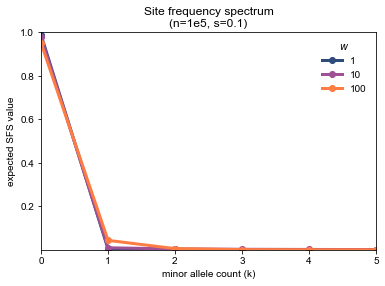

In [11]:
w_range = np.logspace(-1,2,100)
dim = 2
N = 1000
s_vals = [0.001, 0.01, 0.1]

nval=100000
sval=0.1
kmax=100
step=1
w_vals_plot = [1,10,100]
sfs_w0 = [finite_sfs_k(nval,k,w_vals_plot[0],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w1 = [finite_sfs_k(nval,k,w_vals_plot[1],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w2 = [finite_sfs_k(nval,k,w_vals_plot[2],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
plt.plot(range(0,kmax,step),sfs_w0,label=str(w_vals_plot[0]),marker='o',color=color_palette_original[1],linewidth=3,markersize=6)
plt.plot(range(0,kmax,step),sfs_w1,label=str(w_vals_plot[1]),marker='o',color=color_palette_original[3],linewidth=3,markersize=6)
plt.plot(range(0,kmax,step),sfs_w2,label=str(w_vals_plot[2]),marker='o',color=color_palette_original[6],linewidth=3,markersize=6)
# plt.xscale("log")
# plt.yscale("log")
plt.xlim(0,5)
plt.ylim(1e-8,1e0)
plt.xlabel("minor allele count (k)")
plt.ylabel("expected SFS value")
plt.legend(title=r"$w$",frameon=False)
plt.title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")


<ipython-input-47-38b72b19b4ac>:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


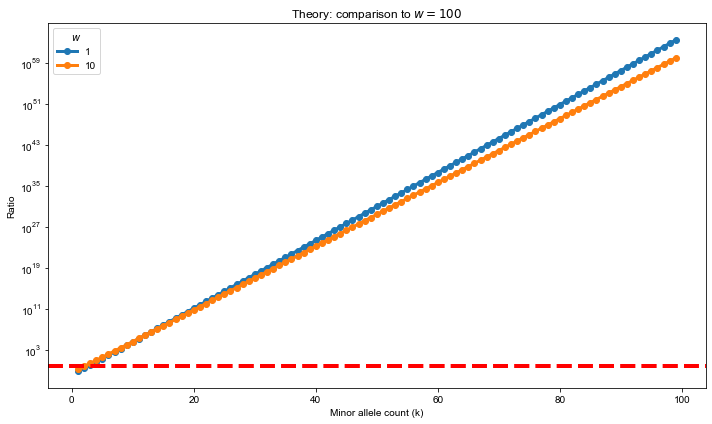

In [47]:
w_range = np.logspace(-1,2,100)
dim = 2
N = 1000
s_vals = [0.001, 0.01, 0.1]

nval=100000
sval=0.1
kmax=100
step=1
w_vals_plot = [1,10,100]
sfs_w0 = [finite_sfs_k(nval,k,w_vals_plot[0],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w1 = [finite_sfs_k(nval,k,w_vals_plot[1],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w2 = [finite_sfs_k(nval,k,w_vals_plot[2],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
# plt.plot(range(0,kmax,step),sfs_w0,label=str(w_vals_plot[0]),marker='o',color=color_palette_original[1],linewidth=3,markersize=6)
# plt.plot(range(0,kmax,step),sfs_w1,label=str(w_vals_plot[1]),marker='o',color=color_palette_original[3],linewidth=3,markersize=6)
# plt.plot(range(0,kmax,step),sfs_w2,label=str(w_vals_plot[2]),marker='o',color=color_palette_original[6],linewidth=3,markersize=6)
# # plt.xscale("log")
# # plt.yscale("log")
# plt.xlim(0,5)
# plt.ylim(1e-8,1e0)
# plt.xlabel("minor allele count (k)")
# plt.ylabel("expected SFS value")
# plt.legend(title=r"$w$",frameon=False)
# plt.title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")


import statsmodels.api as sm

fig,ax = plt.subplots(figsize=(10,6))
unif_vec = sfs_w2
for sfs in [sfs_w0, sfs_w1]:
    ratio = np.array(sfs)[1:]/np.array(unif_vec)[1:]
    xax = range(0,kmax,step)[1:]
#         lowess = sm.nonparametric.lowess(ratio,xax, frac=0.1)

    # Extract the smoothed values
#         lowess_x, lowess_y = zip(*lowess)

    # Plot the LOESS line
#         plt.plot(lowess_x, lowess_y, label='LOESS_'+row.values[0],linewidth=4)
    if sfs==sfs_w0:
        wval_temp = w_vals_plot[0]
    else:
        wval_temp = w_vals_plot[1]
    plt.plot(xax, ratio,label=wval_temp,marker="o")
#             plt.title(row.values[0]+"/1SD_IS Counts")
    plt.title(r"Theory: comparison to $w=100$")
#             plt.xscale('log')
    plt.axhline(y=1, color='r', linestyle='--', label=None,linewidth=4)
#             plt.yscale('log')
    plt.xlabel("Minor allele count (k)")
    plt.ylabel("Ratio")
#             plt.show()
    plt.legend(title=r"$w$")
#     plt.xlim(1,10)
#     plt.ylim(-100,100)
    plt.yscale('log')
    plt.tight_layout()
plt.savefig("counts_ratio_theory.pdf")


<ipython-input-46-84bb0be6b769>:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


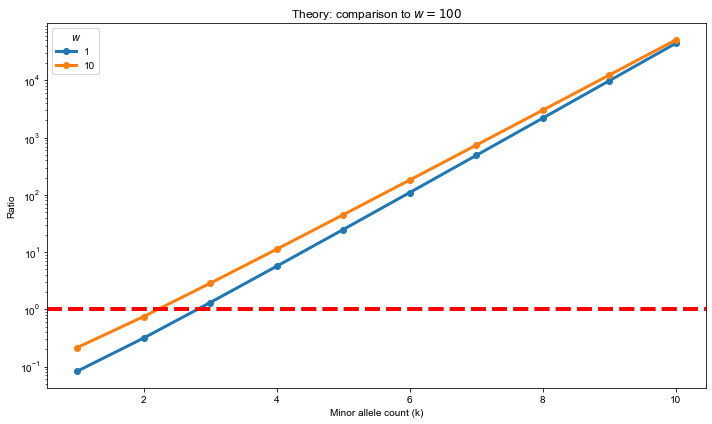

In [46]:
w_range = np.logspace(-1,2,100)
dim = 2
N = 1000
s_vals = [0.001, 0.01, 0.1]

nval=100000
sval=0.1
kmax=100
step=1
w_vals_plot = [1,10,100]
sfs_w0 = [finite_sfs_k(nval,k,w_vals_plot[0],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w1 = [finite_sfs_k(nval,k,w_vals_plot[1],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
sfs_w2 = [finite_sfs_k(nval,k,w_vals_plot[2],sval,w_vals,pole_vals,res_vals,N=N) for k in range(0,kmax,step)]
# plt.plot(range(0,kmax,step),sfs_w0,label=str(w_vals_plot[0]),marker='o',color=color_palette_original[1],linewidth=3,markersize=6)
# plt.plot(range(0,kmax,step),sfs_w1,label=str(w_vals_plot[1]),marker='o',color=color_palette_original[3],linewidth=3,markersize=6)
# plt.plot(range(0,kmax,step),sfs_w2,label=str(w_vals_plot[2]),marker='o',color=color_palette_original[6],linewidth=3,markersize=6)
# # plt.xscale("log")
# # plt.yscale("log")
# plt.xlim(0,5)
# plt.ylim(1e-8,1e0)
# plt.xlabel("minor allele count (k)")
# plt.ylabel("expected SFS value")
# plt.legend(title=r"$w$",frameon=False)
# plt.title("Site frequency spectrum\n(n=1e5, s="+str(sval)+")")


import statsmodels.api as sm

fig,ax = plt.subplots(figsize=(10,6))
unif_vec = sfs_w2
for sfs in [sfs_w0, sfs_w1]:
    ratio = np.array(sfs)[1:11]/np.array(unif_vec)[1:11]
    xax = range(0,kmax,step)[1:11]
#         lowess = sm.nonparametric.lowess(ratio,xax, frac=0.1)

    # Extract the smoothed values
#         lowess_x, lowess_y = zip(*lowess)

    # Plot the LOESS line
#         plt.plot(lowess_x, lowess_y, label='LOESS_'+row.values[0],linewidth=4)
    if sfs==sfs_w0:
        wval_temp = w_vals_plot[0]
    else:
        wval_temp = w_vals_plot[1]
    plt.plot(xax, ratio,label=wval_temp,marker="o")
#             plt.title(row.values[0]+"/1SD_IS Counts")
    plt.title(r"Theory: comparison to $w=100$")
#             plt.xscale('log')
    plt.axhline(y=1, color='r', linestyle='--', label=None,linewidth=4)
#             plt.yscale('log')
    plt.xlabel("Minor allele count (k)")
    plt.ylabel("Ratio")
#             plt.show()
    plt.legend(title=r'$w$')
#     plt.xlim(1,10)
#     plt.ylim(-100,100)
    plt.yscale('log')
    plt.tight_layout()
plt.savefig("counts_ratio_theory_inset.pdf")


In [22]:
np.array(sfs)[1:500]/np.array(unif_vec)[1:500]

array([2.14245539e-01, 7.47593052e-01, 2.85122195e+00, 1.12245835e+01,
       4.49141059e+01, 1.81510385e+02, 7.38443923e+02, 3.01867441e+03,
       1.23846674e+04, 5.09538916e+04, 2.10113077e+05, 8.68029882e+05,
       3.59160935e+06, 1.48803699e+07, 6.17202638e+07, 2.56251535e+08,
       1.06482227e+09, 4.42808817e+09, 1.84267019e+10, 7.67256539e+10,
       3.19645956e+11, 1.33232794e+12, 5.55580601e+12, 2.31771611e+13,
       9.67243757e+13, 4.03795261e+14, 1.68626036e+15, 7.04394548e+15,
       2.94324342e+16, 1.23011880e+17, 5.14246393e+17, 2.15026575e+18,
       8.99298122e+18, 3.76184089e+19, 1.57390079e+20, 6.58612410e+20,
       2.75647402e+21, 1.15383973e+22, 4.83060040e+22, 2.02263494e+23,
       8.47016045e+23, 3.54748606e+24, 1.48594275e+25, 6.22491395e+25,
       2.60802805e+26, 1.09278993e+27, 4.57935864e+27, 1.91917389e+28,
       8.04384995e+28, 3.37172333e+29, 1.41343782e+30, 5.92566169e+30,
       2.48445426e+31, 1.04173652e+32, 4.36833856e+32, 1.83191394e+33,
      

In [30]:
sfs[9]

2.0112617276454422e-10

In [32]:
unif_vec[9]

2.9421007436745482e-08

<ipython-input-93-986016f86adf>:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  unif_vec = sfs_data[sfs_data['width'] == vals_to_plot[1]]['f_per_kb'][0:31]
<ipython-input-93-986016f86adf>:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  narrow_vec = sfs_data[sfs_data['width'] == vals_to_plot[0]]['f_per_kb'][0:31]
<ipython-input-93-986016f86adf>:26: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated 

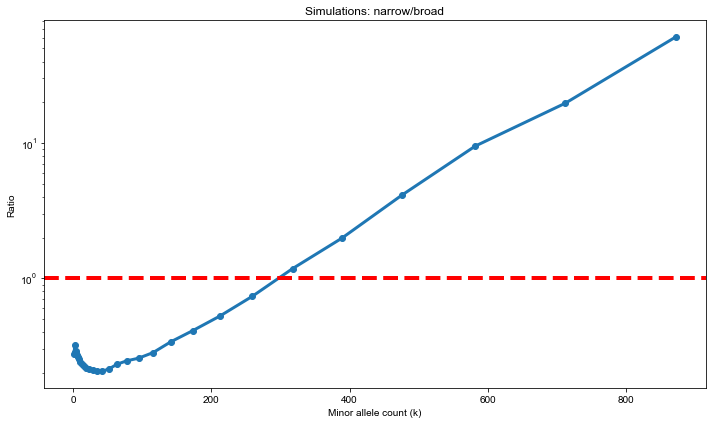

In [93]:

slim_data = pd.read_csv("../simulations/results_Dec2023/summary_df_norecap_dec2023.tsv", sep="\t")
slim_data = slim_data[slim_data['f_per_kb'] != 0]

slim_data_s_05 = slim_data[slim_data['s'] == -0.1]
slim_data_s_005 = slim_data[slim_data['s'] == -0.01]
slim_data_s_0005 = slim_data[slim_data['s'] == -0.001]

w_vals_slim = slim_data_s_05['width'].unique()
w_vals_slim = np.sort(w_vals_slim)
vals_to_plot = [w_vals_slim[5],w_vals_slim[-4]]

mu = 1e-10
nval = 1000
dens = 4/(1/.06)
Dval = 1
s_list = [0.01,0.001]
# w_vals_plot2 = [4.08*6.1237,4.08*100]#[4.08*1.225,4.08*100]
kmax=1000
step=1

colors = [color_palette_original[1],color_palette_original[6]]
    
fig,ax = plt.subplots(figsize=(10,6))
unif_vec = sfs_data[sfs_data['width'] == vals_to_plot[1]]['f_per_kb'][0:31]
narrow_vec = sfs_data[sfs_data['width'] == vals_to_plot[0]]['f_per_kb'][0:31]
xax = sfs_data['allele counts'][0:31]
ratio = np.array(narrow_vec)/np.array(unif_vec)
plt.plot(xax, ratio,label='narrow',marker='o')
plt.axhline(y=1, color='r', linestyle='--', label=None,linewidth=4)
plt.yscale('log')

# plt.show()
# # ['allele counts'][0:]
# for sfs in [sfs_w0, sfs_w1]:
#     ratio = np.array(sfs)[1:11]/np.array(unif_vec)[1:11]
#     xax = range(0,kmax,step)[1:11]
# #         lowess = sm.nonparametric.lowess(ratio,xax, frac=0.1)

#     # Extract the smoothed values
# #         lowess_x, lowess_y = zip(*lowess)

#     # Plot the LOESS line
# #         plt.plot(lowess_x, lowess_y, label='LOESS_'+row.values[0],linewidth=4)
#     if sfs==sfs_w0:
#         wval_temp = w_vals_plot[0]
#     else:
#         wval_temp = w_vals_plot[1]
#     plt.plot(xax, ratio,label=wval_temp,marker="o")
# #             plt.title(row.values[0]+"/1SD_IS Counts")
#     plt.title(r"Theory: comparison to $w=100$")
# #             plt.xscale('log')
#     plt.axhline(y=1, color='r', linestyle='--', label=None,linewidth=4)
# #             plt.yscale('log')
plt.xlabel("Minor allele count (k)")
plt.ylabel("Ratio")
plt.title("Simulations: narrow/broad")
# #             plt.show()
# plt.legend('sample widd')
# #     plt.xlim(1,10)
# #     plt.ylim(-100,100)
#     plt.yscale('log')
plt.tight_layout()
# plt.show()
plt.savefig("counts_ratio_sims.pdf")

In [88]:
ratio

array([  0.27611416,   0.32417057,   0.28408673,   0.29279283,
         0.28010815,   0.27271958,   0.26390609,   0.25404907,
         0.2403139 ,   0.2314057 ,   0.22386954,   0.21937246,
         0.21310311,   0.20898268,   0.20690327,   0.20636312,
         0.21377342,   0.2316922 ,   0.24565641,   0.2569531 ,
         0.28286516,   0.34027152,   0.41128472,   0.52528598,
         0.73774995,   1.17976544,   1.97647436,   4.11421163,
         9.50194932,  19.7071535 ,  60.68465909, 106.71584699])

In [94]:
sfs_data

,s,width,allele counts,se_f,f,n,f_per_kb
4101,-0.001,0.000000,1.106339,9.059472,459.870000,28,4.598700e-03
4104,-0.001,0.000000,2.028693,5.780194,301.513571,28,3.015136e-03
4106,-0.001,0.000000,3.039266,5.662771,192.931786,28,1.929318e-03
4107,-0.001,0.000000,3.720016,4.826664,156.867500,28,1.568675e-03
4108,-0.001,0.000000,4.553244,4.036928,121.309643,28,1.213096e-03
...,...,...,...,...,...,...,...
6137,-0.001,9.797959,1598.926374,0.003297,0.004219,28,4.219372e-08
6138,-0.001,9.797959,1957.062019,0.001955,0.001882,28,1.881972e-08
6139,-0.001,9.797959,2395.414703,0.000919,0.000622,28,6.215022e-09
6140,-0.001,9.797959,2931.951846,0.000479,0.000148,28,1.481571e-09


In [ ]:
sfs_data = slim_data_s_0005